In [26]:
# imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans  
# load iris 
# convert to pandas df
# display
# standardize only the features not the data and keep it as a seperate variable keep one for classification and one for kmeans 


## Data Integration and Cleaning

In [27]:
# iris = load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# df['target'] = iris.target
# df['species'] = df['target'].map(dict(zip(range(3), iris.target_names)))
# print(df.head())
# print(f'Shape: {df.shape}')

# load dataset
df = pd.read_csv('../data/customer_intelligence_dataset.csv')
df.head()

,sale_id,customer_id,product_id,product_name,category,price,quantity,sale_date,total_value,age,gender,region,segment,churn,tenure_months,last_purchase_date,feedback_text,sentiment
0,S000001,CUST01553,P004,Desk,Furniture,12000,2,2020-01-07,24000,40,Female,West,Small Business,1,37,2023-04-04,"Terrible experience, will not buy again.",Negative
1,S000002,CUST00161,P010,Projector,Electronics,45000,2,2023-11-10,90000,50,Female,West,Corporate,0,44,2023-03-02,Excellent customer service.,Positive
2,S000003,CUST00627,P010,Projector,Electronics,45000,4,2022-07-04,180000,33,Male,South,Corporate,0,25,2023-11-04,Product quality could be better.,Neutral
3,S000004,CUST01291,P009,Monitor,Electronics,12000,1,2023-10-18,12000,41,Male,West,Consumer,0,56,2023-08-18,"Delivery was late, not happy.",Positive
4,S000005,CUST01456,P004,Desk,Furniture,12000,4,2023-09-13,48000,60,Female,West,Consumer,0,52,2023-05-14,"Delivery was late, not happy.",Positive


In [28]:
# look for dupilcates, nullvalues
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

null_values = df.isnull().sum()
print("\nNull values in each column:\n", null_values)

Number of duplicate rows: 0

Null values in each column:
 sale_id               0
customer_id           0
product_id            0
product_name          0
category              0
price                 0
quantity              0
sale_date             0
total_value           0
age                   0
gender                0
region                0
segment               0
churn                 0
tenure_months         0
last_purchase_date    0
feedback_text         0
sentiment             0
dtype: int64


In [29]:
# check data types
data_types = df.dtypes
print("\nData types of each column:\n", data_types)


Data types of each column:
 sale_id               object
customer_id           object
product_id            object
product_name          object
category              object
price                  int64
quantity               int64
sale_date             object
total_value            int64
age                    int64
gender                object
region                object
segment               object
churn                  int64
tenure_months          int64
last_purchase_date    object
feedback_text         object
sentiment             object
dtype: object


In [30]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'], errors='coerce')
# check for null values after conversion
null_values_after_conversion = df.isnull().sum()
print("\nNull values after date conversion:\n", null_values_after_conversion)


Null values after date conversion:
 sale_id               0
customer_id           0
product_id            0
product_name          0
category              0
price                 0
quantity              0
sale_date             0
total_value           0
age                   0
gender                0
region                0
segment               0
churn                 0
tenure_months         0
last_purchase_date    0
feedback_text         0
sentiment             0
dtype: int64


## Exploratory Data Analysis

In [31]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
               price     quantity            sale_date    total_value  \
count   8000.000000  8000.000000                 8000    8000.000000   
mean   19091.193750     2.997000  2021-12-21 08:12:18   57801.706250   
min       50.000000     1.000000  2020-01-01 00:00:00      50.000000   
25%     3000.000000     2.000000  2020-12-18 00:00:00    8000.000000   
50%    12000.000000     3.000000  2021-12-16 00:00:00   30000.000000   
75%    25000.000000     4.000000  2022-12-20 00:00:00   70000.000000   
max    70000.000000     5.000000  2023-12-31 00:00:00  350000.000000   
std    21398.129086     1.414122                  NaN   77182.675351   

               age        churn  tenure_months          last_purchase_date  
count  8000.000000  8000.000000    8000.000000                        8000  
mean     41.483875     0.248125      29.721125  2023-07-01 02:03:39.600000  
min      18.000000     0.000000       1.000000         2023-01-01 00:00:00  
25%      30.000000   

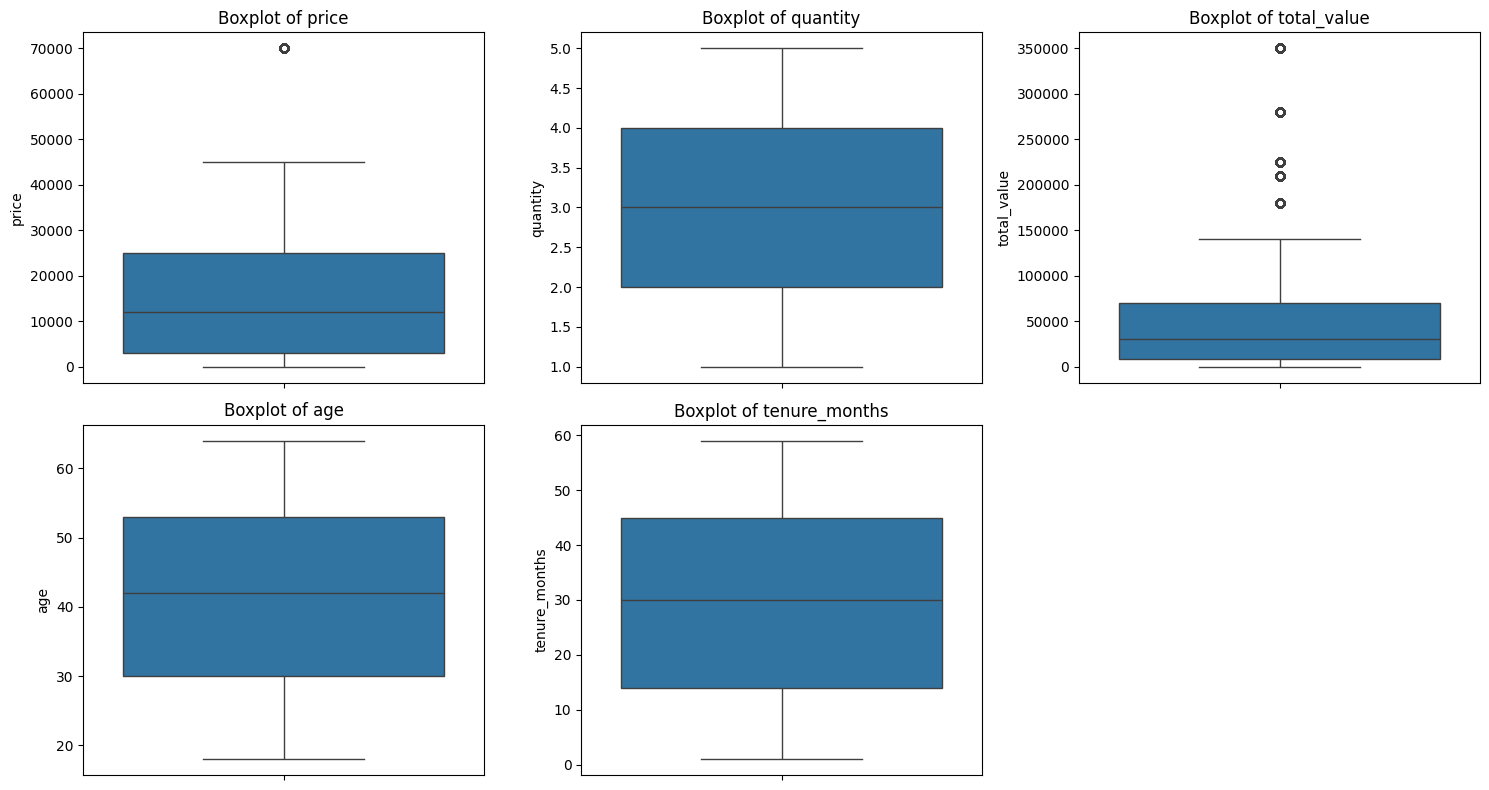

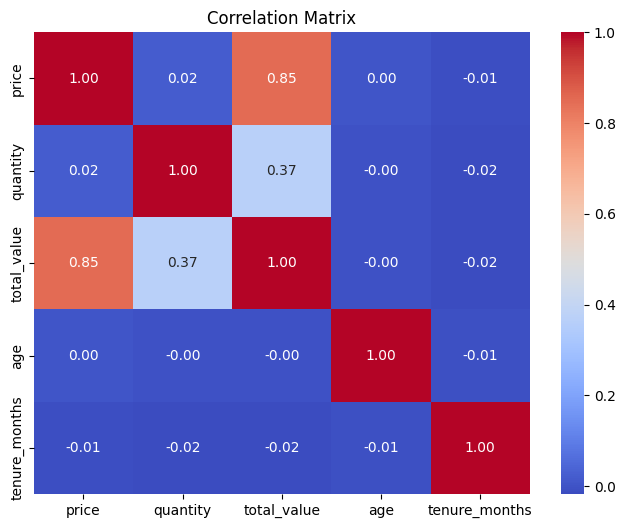

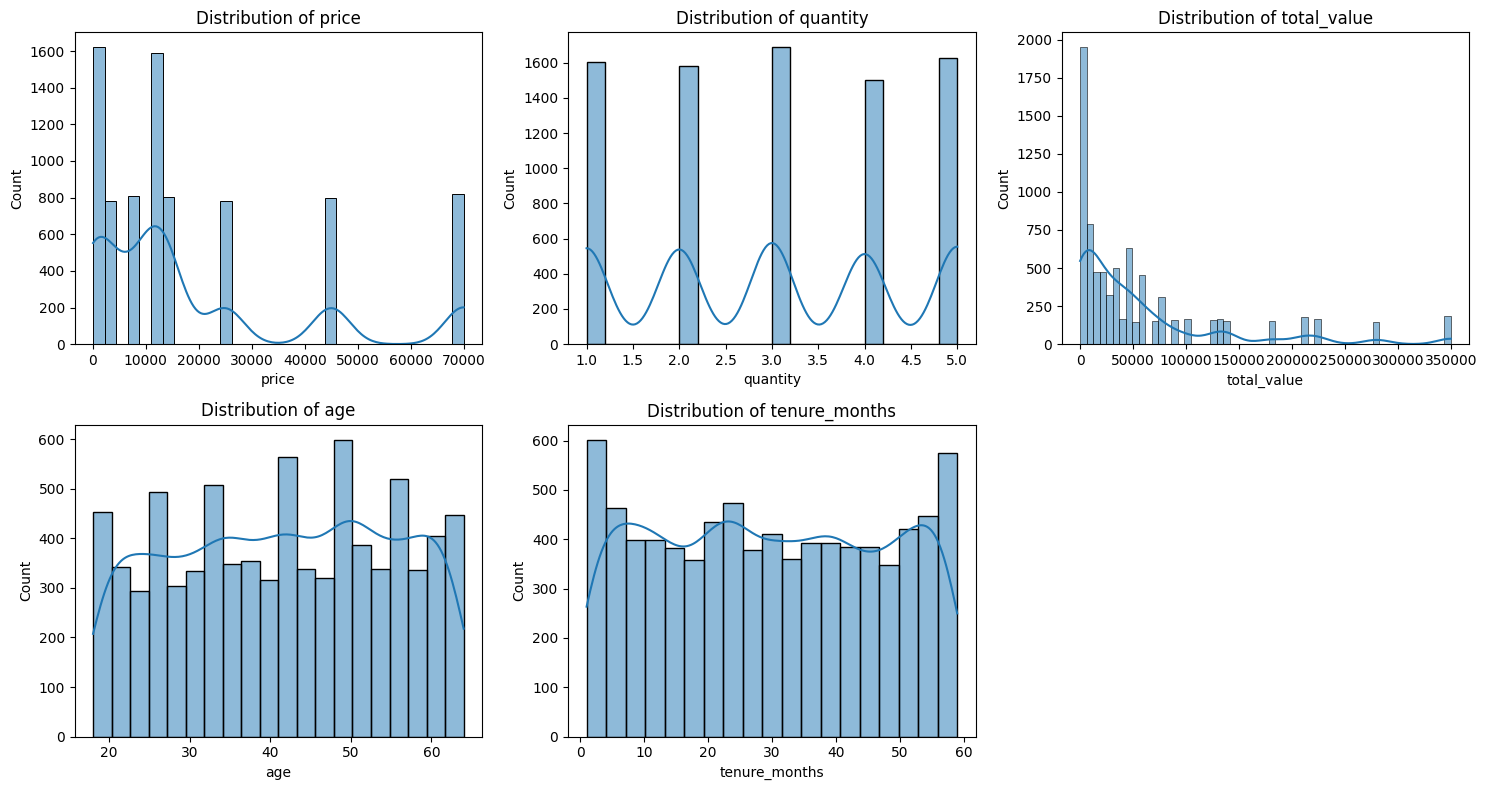

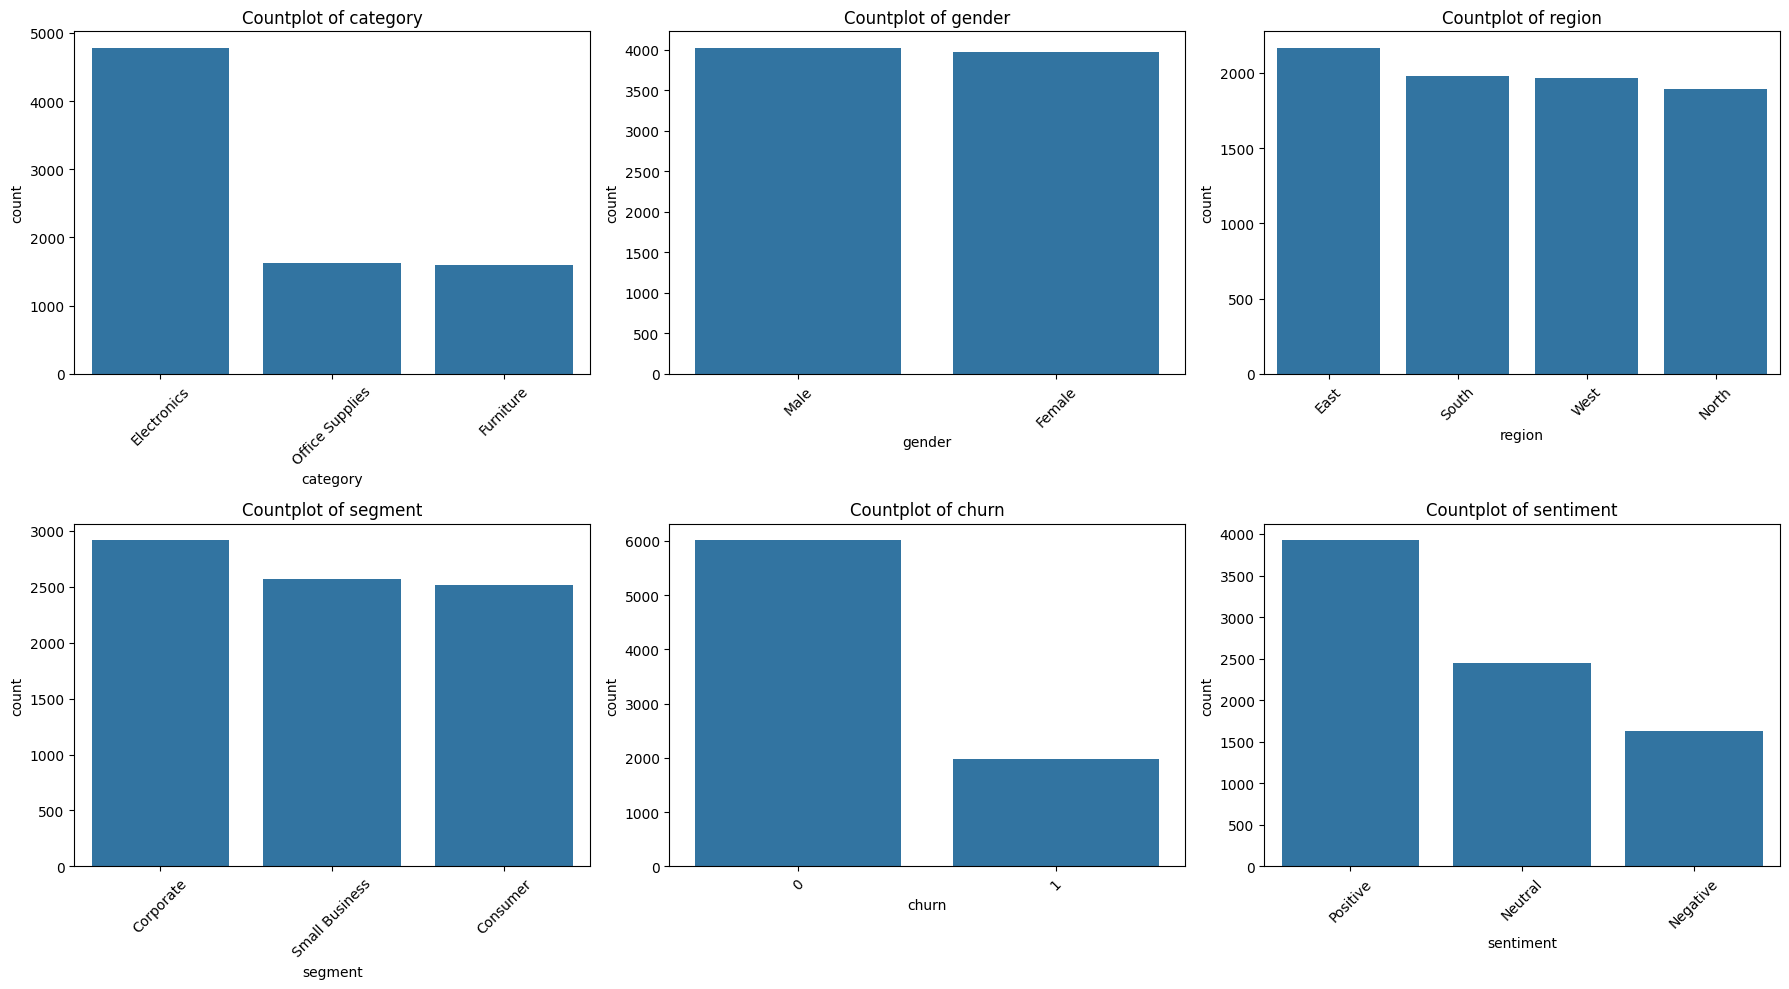

In [32]:
# Outlier Detection using boxplots for numerical columns
numerical_cols = ['price', 'quantity', 'total_value', 'age', 'tenure_months']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
corr = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visual summaries: Distribution plots for numerical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Countplot for categorical columns
categorical_cols = ['category', 'gender', 'region', 'segment', 'churn', 'sentiment']
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Log transformation for skewed numerical features
df['log_price'] = np.log1p(df['price'])
df['log_total_value'] = np.log1p(df['total_value'])

In [34]:
scaler = StandardScaler()
# Standardize numerical features
scaled_features = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numerical_cols)
df_scaled['churn'] = df['churn']
df_scaled.head()

,price,quantity,total_value,age,tenure_months,churn
0,-0.331414,-0.705075,-0.437972,-0.111310,0.419732,1
1,1.210873,-0.705075,0.417196,0.638823,0.823382,0
2,1.210873,0.709318,1.583334,-0.636403,-0.272241,0
3,-0.331414,-1.412272,-0.593457,-0.036297,1.515354,0
4,-0.331414,0.709318,-0.127002,1.388956,1.284697,0


In [35]:
# export the cleaned and scaled datasets
df.to_csv("../data/customer_raw.csv", index=False)
df_scaled.to_csv("../data/customer_scaled.csv", index=False)